# Normal distribution 

The simplest model: the Normal distribution. It is used as a basic components in many more complex models.

In [3]:
using Pkg
Pkg.activate("../");

using LinearAlgebra
using Plots
using Random

import ExpFamilyDistributions
const EFD = ExpFamilyDistributions

using Revise
using BayesianModels

# Plotting function
include("plotting.jl");

  Activating environment at `~/Repositories/BayesianModels.jl/Project.toml`


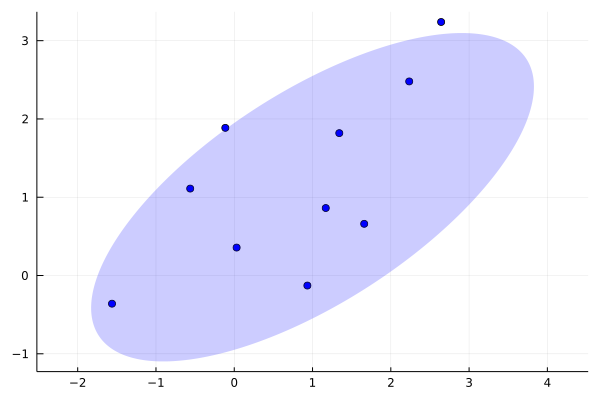

In [42]:
T = Float64
μₓ = T[1, 1] 
Σₓ = T[2 1; 1.0  1.1]

function draw(n, μ, Σ)
    L = cholesky(Σ).L
    hcat([μ + L*randn(T, 2) for i in 1:n]...)
end


X = draw(10, μₓ, Σₓ)

p = plot(legend = false, aspect_ratio = 1)
scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(μₓ, Σₓ, σ = 2, color = :blue, linewidth = 0, fillalpha = 0.2)

In [52]:
D = 2
W₀ = Matrix{Float64}(I, D, D)
μ₀ = zeros(D)
Σ₀ = Matrix{Float64}(I, D, D)
pstrength = 1

μ = BayesianParameter(EFD.Normal(μ₀, pstrength * Σ₀), 
               EFD.Normal(μ₀, pstrength * Σ₀))

Λ = BayesianParameter(EFD.Wishart(W₀, D - 1 + pstrength), 
               EFD.Wishart(W₀, D - 1 + pstrength))


model = BayesianModels.NormalIndependentParams{D}(μ, Λ)

BayesianModels.NormalIndependentParams{2} (
  (μ): typename(BayesianParameter)
  (Λ): typename(BayesianParameter)
)


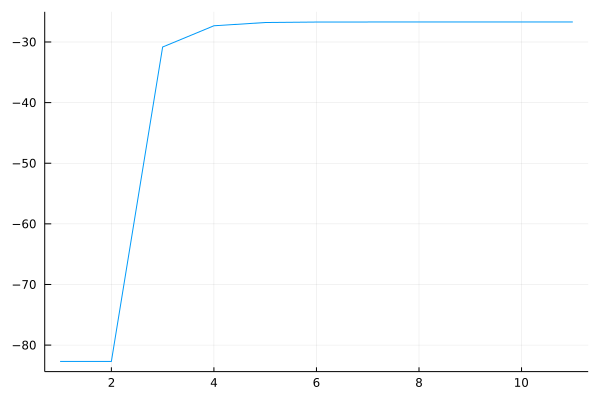

In [53]:
lrate = 1
epochs = 10

elbos = [elbo(model, X)]
params = filter(isbayesianparam, getparams(model))

for epoch in 1:epochs
    𝓛, ∇ξ = ∇elbo(model, X, params = params)
    gradstep(∇ξ, lrate = lrate)
    push!(elbos, 𝓛)
end

plot(elbos, legend = false)

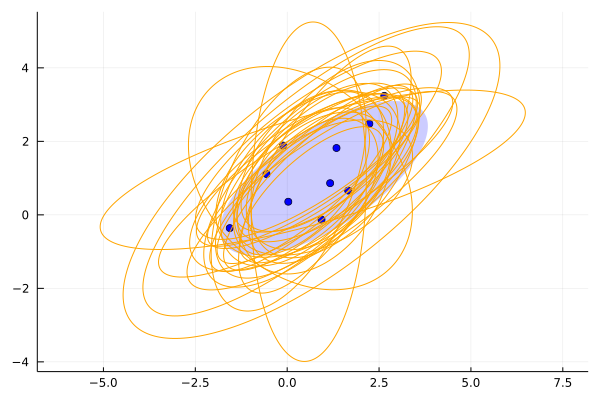

In [54]:
p = plot(legend = false, aspect_ratio = 1)
scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(μₓ, Σₓ, σ = 2, color = :blue, linecolor = :blue, linewidth = 0, fillalpha = 0.2)

μs = EFD.sample(model.μ.posterior, 30)
Σs = [inv(Λₗ) for Λₗ in EFD.sample(model.Λ.posterior, 30)]
for (μ, Σ) in zip(μs, Σs)
    plotnormal!(μ, Σ, σ = 2, color = :orange, linecolor = :orange, fillalpha = 0)
end

p

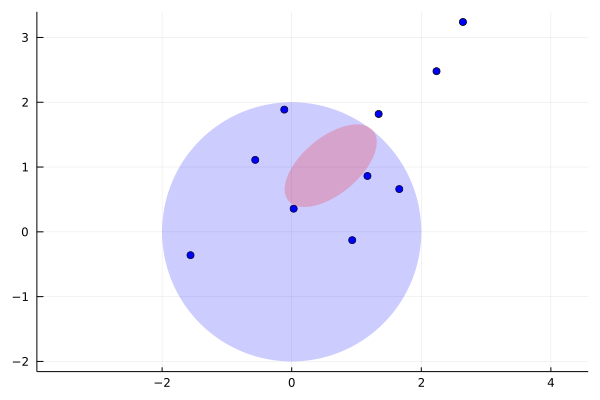

In [55]:
p = plot(legend = false, aspect_ratio = 1)
scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(model.μ.prior.μ, model.μ.prior.Σ, σ = 2, color = :blue, linecolor = :blue, linewidth = 0, fillalpha = 0.2)
plotnormal!(model.μ.posterior.μ, model.μ.posterior.Σ, σ = 2, color = :red, linecolor = :red, linewidth = 0, fillalpha = 0.2)

p